In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
from sklearn.metrics import mean_squared_error

In [3]:
data_path = './data_lab_car/'
path = []
for file in glob.glob(data_path + '/*/*.pkl'):
    with open(file, 'rb') as h:
        path.append(pickle.load(h))

In [4]:
def path_analysis(plan_path, real_path, title):
    
    plan_path = np.array(plan_path)
    real_path = np.array(real_path)
    x = int(np.floor(len(real_path)/len(plan_path)))
    mean_path = []
    mean_path = np.array([[np.mean(real_path[0:x,0]),np.mean(real_path[0:x,1])]])
    for i in range((len(plan_path)-1)):
        pp = np.array([[np.mean(real_path[(i+1)*x:(i+2)*x,0]),np.mean(real_path[(i+1)*x:(i+2)*x,1])]])
        mean_path = np.append(mean_path, pp, axis=0)

    plt.plot(plan_path[:,0],plan_path[:,1], color='b',)
    plt.scatter(real_path[:,0],real_path[:,1], s=0.5, c='r')
    plt.plot(mean_path[:,0],mean_path[:,1], color='r',)
    plt.xlabel('x[m]')
    plt.ylabel('y[m]')
    plt.legend(['plan path','mean real path'])
    plt.title(title)
    MSE = np.round(mean_squared_error(plan_path, mean_path)*1000, 3)
    print(f'Mean squered error : {MSE}[mm]')
        
    return

Mean squered error : 1.794[mm]


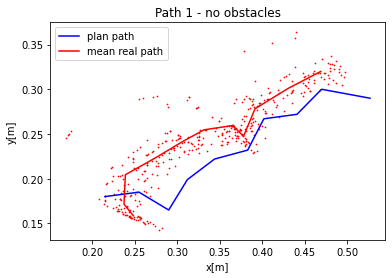

In [6]:
path_analysis(path[0][0], path[0][1], 'Path 1 - no obstacles')

Mean squered error : 5.162[mm]


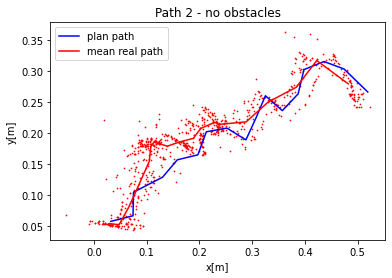

In [5]:
path_analysis(path[1][0], path[1][1], 'Path 2 - no obstacles')

Mean squered error : 2.522[mm]


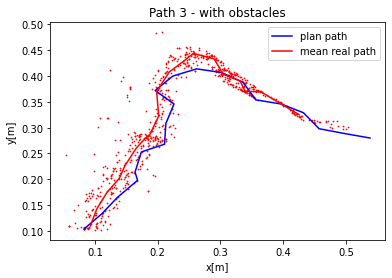

In [6]:
path_analysis(path[2][0], path[2][1], 'Path 3 - with obstacles')

Mean squered error : 1.907[mm]


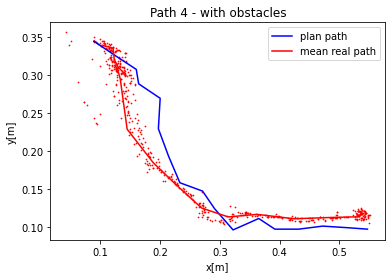

In [7]:
path_analysis(path[3][0], path[3][1], 'Path 4 - with obstacles')